<a href="https://colab.research.google.com/github/arnav-007/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample


In [56]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                 delimiter=',', encoding='ISO-8859-1')
df.columns = ['Sentiment','id','date','query','user','text']
df.head()

,Sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [57]:
df.tail()

,Sentiment,id,date,query,user,text
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?
1048571,4,1960186607,Fri May 29 07:33:45 PDT 2009,NO_QUERY,sugababez,cant wait til her date this weekend


In [58]:
df.isnull().sum()


Sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

In [59]:
df.shape


(1048572, 6)

In [60]:
df['Sentiment'].value_counts()


0    799996
4    248576
Name: Sentiment, dtype: int64

In [61]:
df = df[['Sentiment','text']]


In [62]:
df.columns


Index(['Sentiment', 'text'], dtype='object')

<Axes: xlabel='Sentiment', ylabel='Count'>

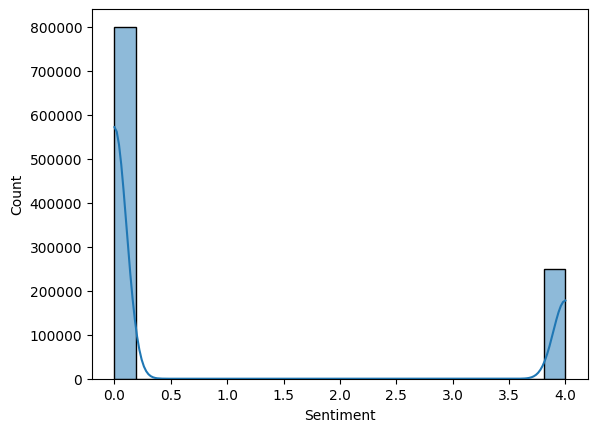

In [63]:
sns.histplot(df['Sentiment'],kde=True)


In [64]:
df['Sentiment'] = df['Sentiment'].replace({4:1})


In [65]:

df.head()

,Sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


Data Preprocessing¶


In [66]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:

stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

1048572
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [68]:
final_corpus = []           # List to store tokenized and lemmatized text as lists
final_corpus_joined = []    # List to store tokenized and lemmatized text as joined strings

for i in df.index:
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = text.split()  # Tokenize the text into a list of words

    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]  # Lemmatize each word and remove stopwords
    text1 = " ".join(text)  # Join the tokenized and lemmatized words into a string

    final_corpus.append(text)           # Append the tokenized and lemmatized text as a list
    final_corpus_joined.append(text1)   # Append the tokenized and lemmatized text as a joined string


In [69]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["Sentiment"] = df["Sentiment"].values

In [70]:
data_cleaned['Sentiment'].value_counts()


0    799996
1    248576
Name: Sentiment, dtype: int64

In [71]:
data_cleaned.head()


,text,Sentiment
0,upset update facebook texting might cry result...,0
1,kenichan dived many time ball managed save res...,0
2,whole body feel itchy like fire,0
3,nationwideclass behaving mad see,0
4,kwesidei whole crew,0


EDA

In [72]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['Sentiment'] = df["Sentiment"].values
data_eda.head()

,text,Sentiment
0,"[upset, update, facebook, texting, might, cry,...",0
1,"[kenichan, dived, many, time, ball, managed, s...",0
2,"[whole, body, feel, itchy, like, fire]",0
3,"[nationwideclass, behaving, mad, see]",0
4,"[kwesidei, whole, crew]",0


In [73]:
# Storing positive data seperately
positive = data_eda[data_eda['Sentiment'] == 1]
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['text'].tolist()

In [74]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

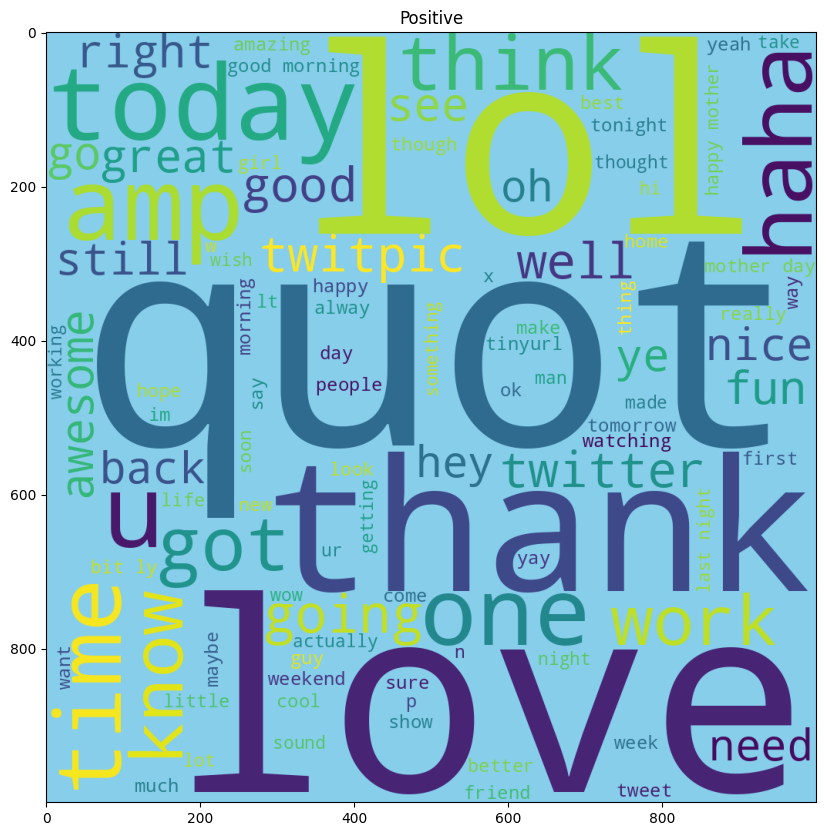

In [77]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=1000,
                      background_color='skyblue',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

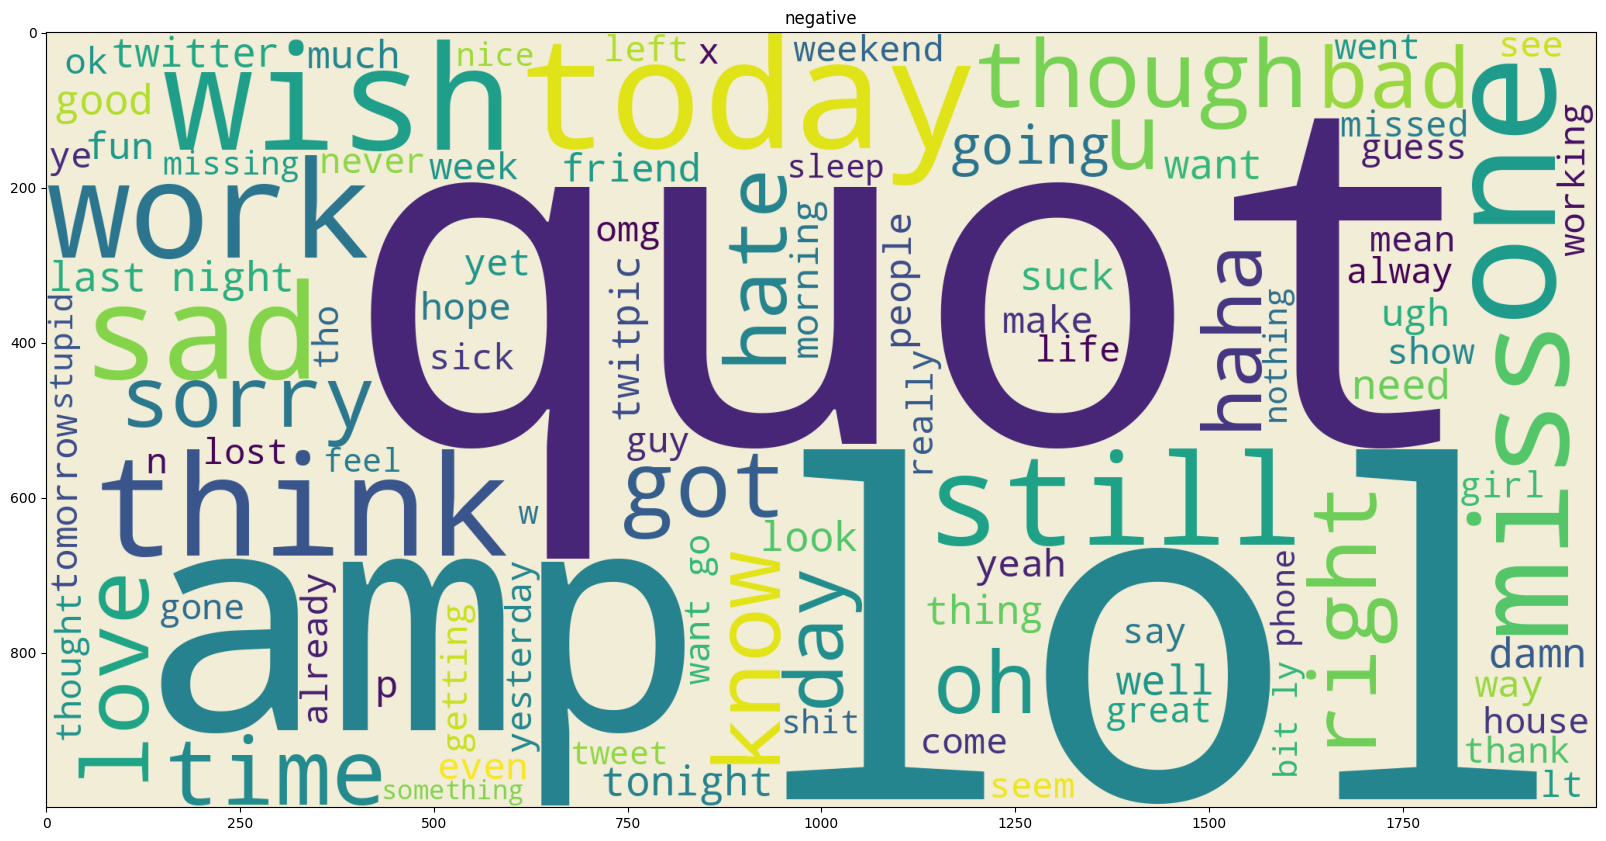

In [78]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

Inference:

Positive data has words like Thank, love , LOL, Haha ets





Negative data has words like work, sad, tired, suck sorry Some of the words are still common in both such as Lol, quot

In [83]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1

    return(dic)
count_corpus = get_count(positive_list)

In [80]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

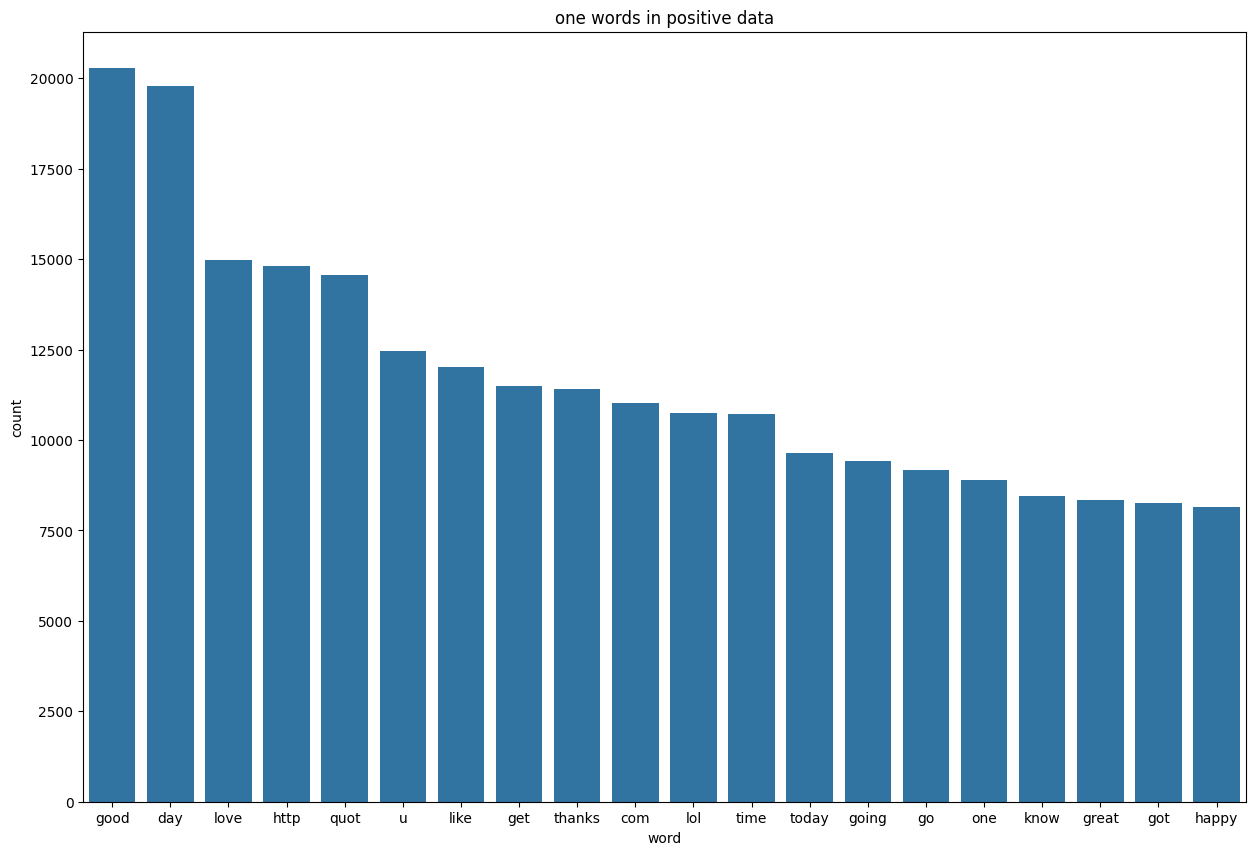

In [81]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

In [84]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1

    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(negative_list)

In [85]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

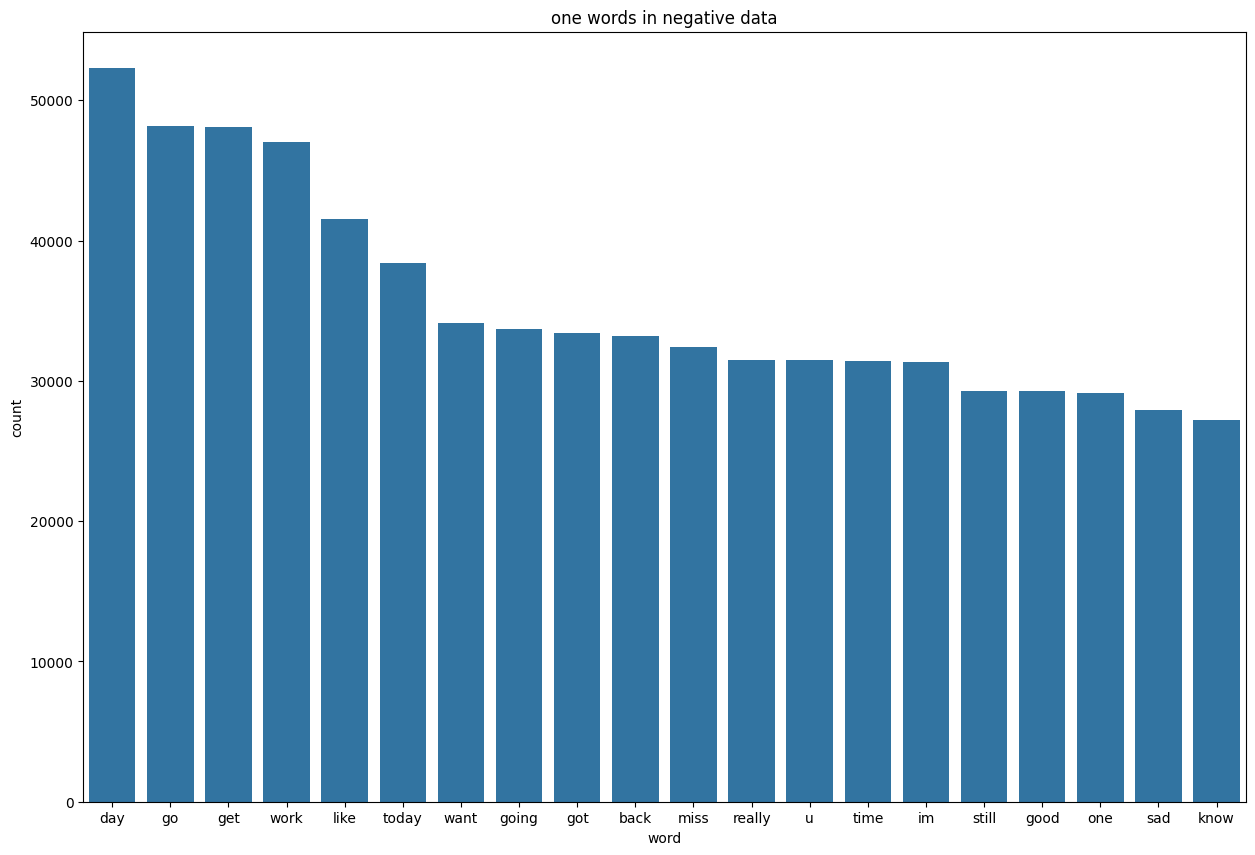

In [86]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

Positive data has words like good, day, thanks, great, happy




Negative data has words like work, miss, sad etc

TFIDF for sentiment analysis¶


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['Sentiment']

Classification




Naive bayes for sentiment analysis

In [88]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(positive_list)
negative_tokens_for_model = get_tweets_for_model(negative_list)

In [89]:
import random
positive_dataset = [(review_dict, "Positive")
                     for review_dict in positive_tokens_for_model]

negative_dataset = [(review_dict, "Negative")
                     for review_dict in negative_tokens_for_model]
dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:333091]
test_data = dataset[333091:]

In [90]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print(" Training Accuracy is:", round(classify.accuracy(classifier, train_data),2)*100)

print("Testing Accuracy is:", round(classify.accuracy(classifier, test_data),2)*100)

 Training Accuracy is: 88.0
Testing Accuracy is: 81.0


Split Data between Training and testing sets

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size=0.33,random_state=42,stratify = y)


Logistic Regression

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


In [104]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

In [105]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

training accuracy =  86.0
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    535997
           1       0.80      0.54      0.64    166546

    accuracy                           0.86    702543
   macro avg       0.83      0.75      0.78    702543
weighted avg       0.85      0.86      0.85    702543



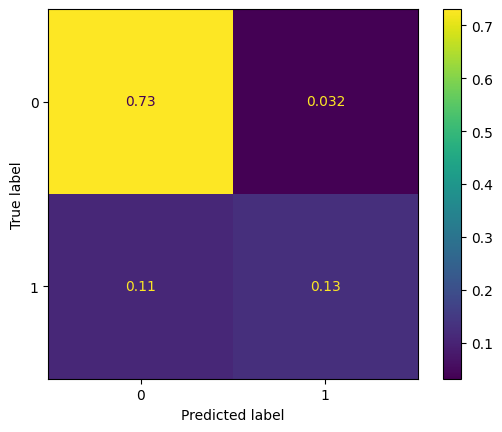

testing accuracy =  83.0
              precision    recall  f1-score   support

           0       0.85      0.94      0.90    263999
           1       0.73      0.48      0.58     82030

    accuracy                           0.83    346029
   macro avg       0.79      0.71      0.74    346029
weighted avg       0.82      0.83      0.82    346029



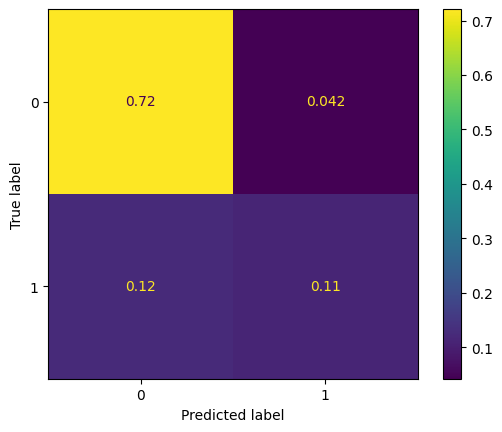

In [106]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
# accuracy_score(y_train,y_train_pred)*100
metrics(y_train,y_train_pred,y_test,y_test_pred)


Multinomial NB


training accuracy =  80.0
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    535997
           1       0.99      0.16      0.27    166546

    accuracy                           0.80    702543
   macro avg       0.89      0.58      0.58    702543
weighted avg       0.84      0.80      0.74    702543



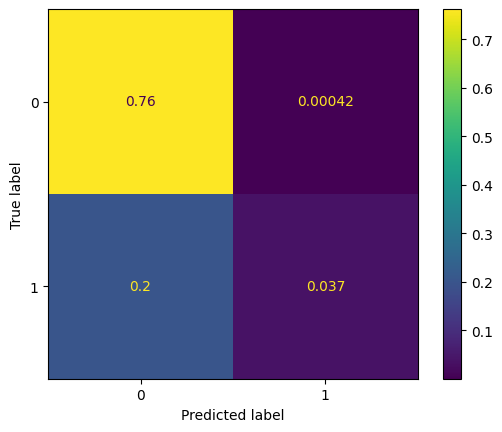

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.78      1.00      0.87    263999
           1       0.89      0.08      0.15     82030

    accuracy                           0.78    346029
   macro avg       0.83      0.54      0.51    346029
weighted avg       0.80      0.78      0.70    346029



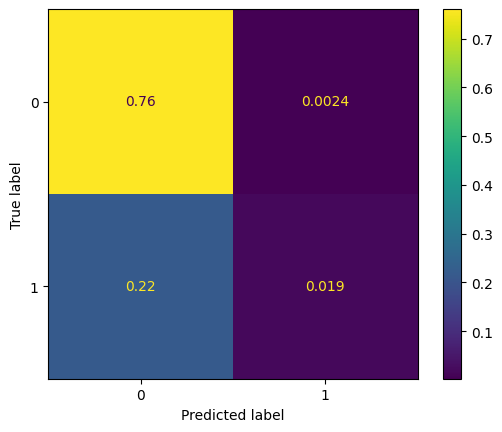

In [107]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred1 = NB.predict(X_train)
y_test_pred1 = NB.predict(X_test)
metrics(y_train,y_train_pred1,y_test,y_test_pred1)


Linear SVC


training accuracy =  92.0
              precision    recall  f1-score   support

           0       0.92      0.97      0.95    535997
           1       0.89      0.74      0.81    166546

    accuracy                           0.92    702543
   macro avg       0.91      0.85      0.88    702543
weighted avg       0.91      0.92      0.91    702543



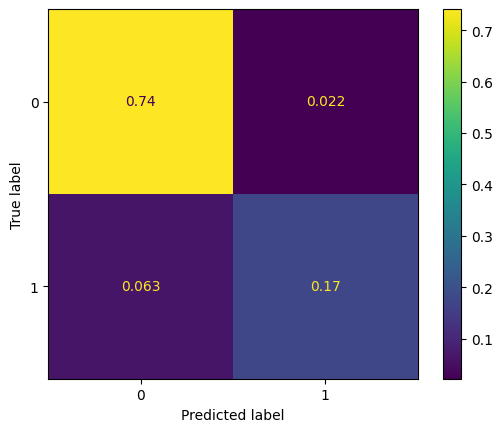

testing accuracy =  83.0
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    263999
           1       0.70      0.50      0.58     82030

    accuracy                           0.83    346029
   macro avg       0.78      0.72      0.74    346029
weighted avg       0.82      0.83      0.82    346029



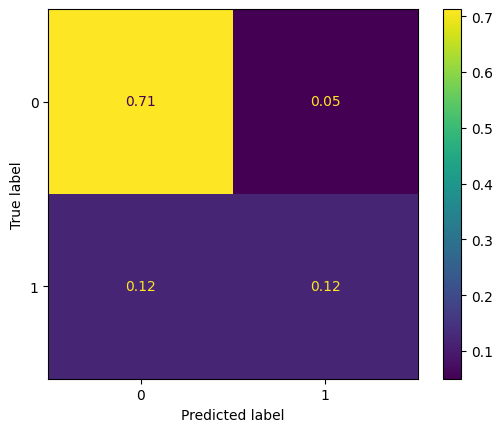

In [109]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred2 = svc.predict(X_train)
y_test_pred2 = svc.predict(X_test)
metrics(y_train,y_train_pred2,y_test,y_test_pred2)


Linear SVC performs the best with maximum accuracy